In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.util import ngrams

In [2]:
data = pd.read_csv('../data/customer_queries_data.csv')
data.head(5)

,query,label
0,I'm having trouble accessing my Ryanair custom...,Customer Account Issues
1,Can I change my flight date after booking?,Flight Changes
2,Why was my credit card payment rejected?,Payment Issues
3,How can I change the date of my flight reserva...,Flight Changes
4,What are the policies for traveling with an in...,Child and Infant Travel


### Check shape

In [3]:
data.shape

(20000, 2)

### Check for missing values in the dataset

In [4]:
data.isnull().sum()

query    0
label    0
dtype: int64

### Check how many classes in the dataset

In [5]:
data.label.nunique()

30

### Class distribution

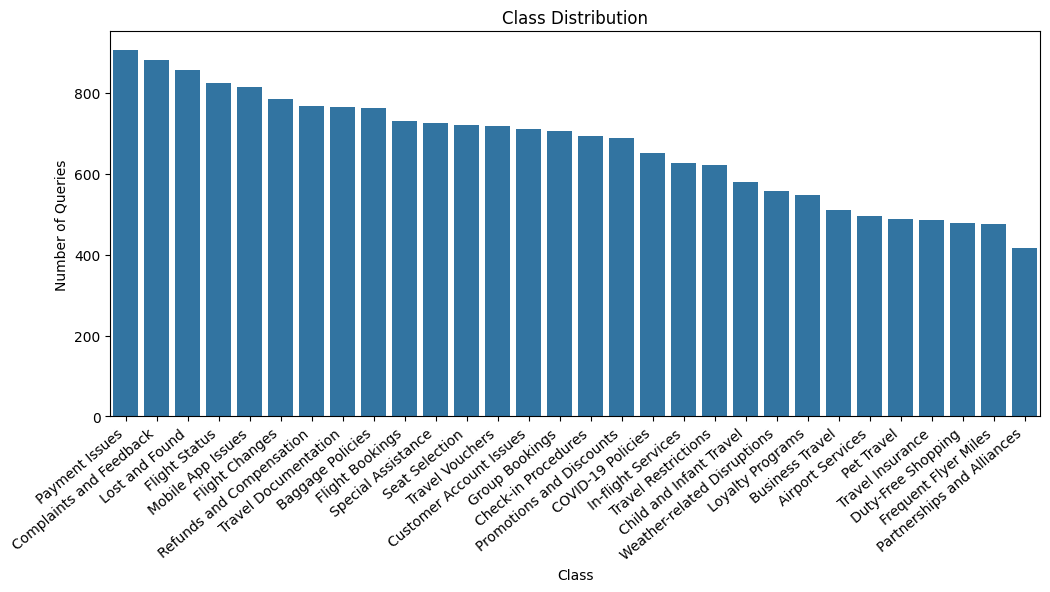

In [6]:
class_counts = data['label'].value_counts()  # Count the number of queries per class
plt.figure(figsize=(12, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)  # Create a bar plot of class distribution
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Queries')
plt.xticks(rotation=40, ha='right')
plt.show()


This graph shows the distribution of different classes. We observe that there are 30 unique classes, with some classes having significantly more samples than others. This indicates class imbalance, which the model needs to handle effectively.
Classes such as "Payment Issues," "Complaints and Feedback," "Lost and Found," etc., have the highest number of queries. On the other hand, classes like "Frequent Flyer Miles," "Travel Insurance," and "Partnerships and Alliances" have fewer queries.

### Query length analysis

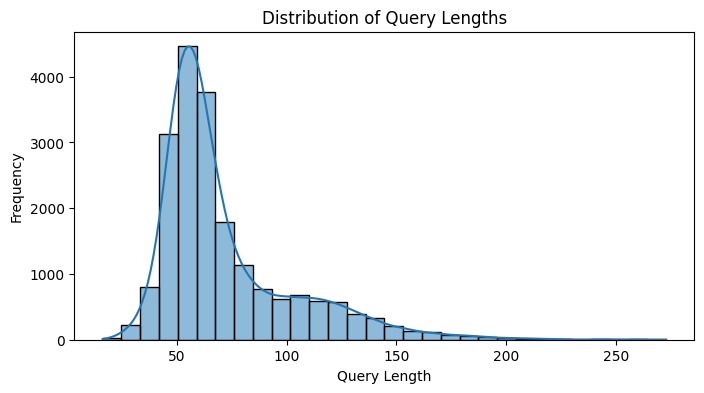

In [7]:
data['query_length'] = data['query'].apply(len)  # Calculate the length of each query
plt.figure(figsize=(8, 4))
sns.histplot(data['query_length'], bins=30, kde=True)  # Create a histogram of query lengths
plt.title('Distribution of Query Lengths')
plt.xlabel('Query Length')
plt.ylabel('Frequency')
plt.show()

This graph illustrates the distribution of query lengths. The majority of the queries are between 25 and 100 characters long, with a significant number of queries around 50 characters.
This suggests that most queries are relatively short. Therefore, using TF-IDF vectorization is a good choice for feature extraction as it effectively captures the importance of words in short texts by assigning appropriate weights based on their frequency.

### Query Length by Class

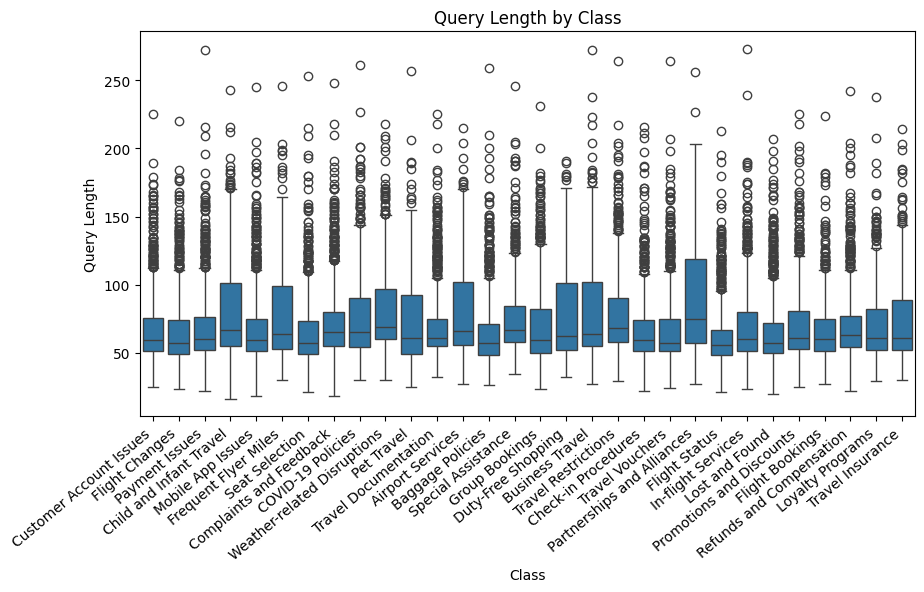

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='query_length', data=data)  # Create a box plot of query length by class
plt.title('Query Length by Class')
plt.xlabel('Class')
plt.ylabel('Query Length')
plt.xticks(rotation=40, ha='right')
plt.show()

This graph shows the distribution of query lengths for each class. While there is some variation, most classes have a median query length between 50 and 100 characters, with a few outliers extending to longer lengths.
This further reinforces the need for effective text preprocessing and feature extraction.

### EDA Summary

Based on the analysis we can draw the following conclusions:
- The dataset exhibits significant class imbalance. A few classes have a high number of instances, while many others are underrepresented. This imbalance is a critical challenge as it may lead the model to be biased towards the majority classes, potentially neglecting the minority ones.
- The majority of queries are relatively short, with a large number of them containing fewer than 10 words. This indicates that most customer queries are concise.
- The average query length varies significantly across different classes. Some classes have consistently longer queries, while others are characterized by shorter ones. This variation suggests that query length could be an important feature in distinguishing between different classes.